## Feature Matching

[opencv](https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

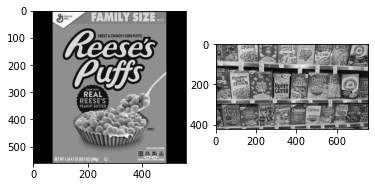

In [4]:
reeses = cv2.imread('images/reeses_puffs.png',0)   
cereals = cv2.imread('images/many_cereals.jpg',0) 
plt.subplot(1,2,1)
plt.imshow(reeses,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(cereals,cmap='gray')

## Brute Force Detection with ORB Descriptors
**Brute-Force Matcher**

ORB is a fusion of FAST keypoint detector and BRIEF descriptor with some added features to improve the performance.

In [5]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

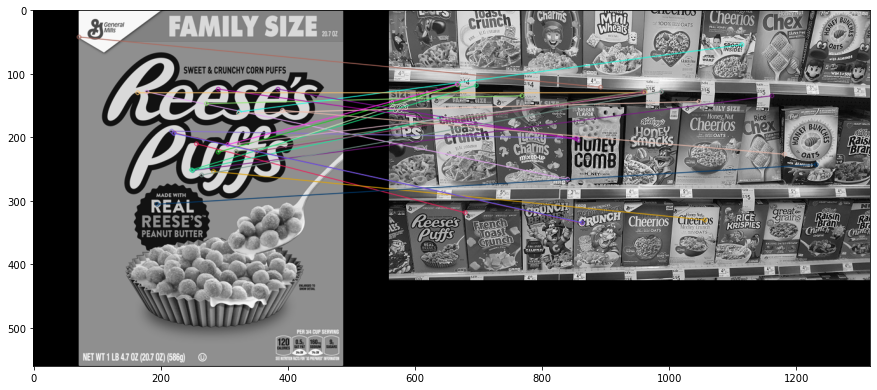

In [8]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.imshow(reeses_matches,cmap='gray')

## Brute-Force Matching with SIFT Descriptors and Ratio Test

In [11]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

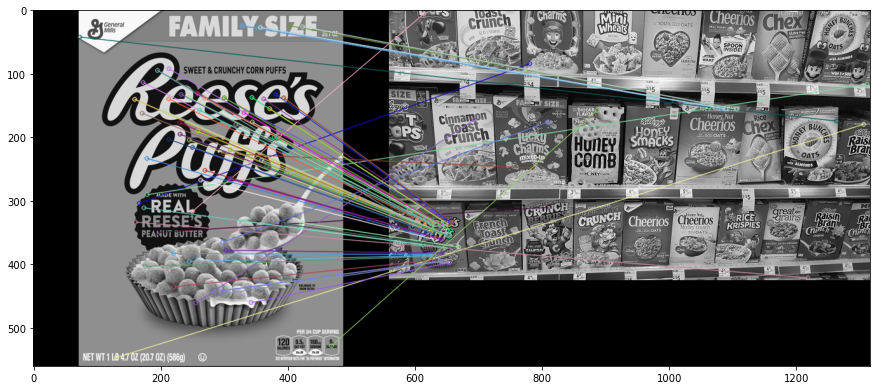

In [12]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.imshow(sift_matches,cmap='gray')

## FLANN based Matcher

In [16]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

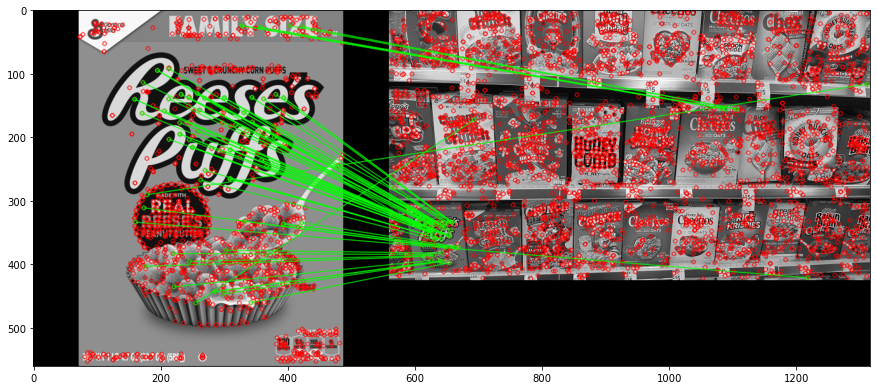

In [15]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.imshow(flann_matches,cmap='gray')